# 13-04 허깅페이스 토크나이저(Huggingface Tokenizer)

자연어 처리 스타트업 허깅페이스가 개발한 패키지 tokenizers는 자주 등장하는 서브워드들을 하나의 토큰으로 취급하는 다양한 서브워드 토크나이저를 제공합니다. 이번 실습에서는 이 중에서 WordPiece Tokenizer를 실습해보겠습니다. 

In [1]:
pip install tokenizers

Note: you may need to restart the kernel to use updated packages.


## BERT의 워드피스 토크나이저(BertWordPieceTokenizer)

구글이 공개한 딥 러닝 모델 BERT에는 WordPiece Tokenizer가 사용되었습니다. 허깅페이스는 해당 토크나이저를 직접 구현하여 tokenizers라는 패키지를 통해 버트워드피스토크나이저(BertWordPieceTokenizer)를 제공합니다.

In [2]:
import pandas as pd
import urllib.request
from tokenizers import BertWordPieceTokenizer

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x16de6fc5970>)

In [3]:
naver_df = pd.read_table('ratings.txt')
naver_df = naver_df.dropna(how='any')
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [6]:
tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)
# lowercase : 대소문자를 구분 여부. True일 경우 구분하지 않음
# strip_accents : True일 경우 악센트 제거

In [7]:
data_file = 'naver_review.txt'
vocab_size = 30000
limit_alphabet = 6000
min_frequency = 5

tokenizer.train(files=data_file,
                vocab_size=vocab_size,
                limit_alphabet=limit_alphabet,
                min_frequency=min_frequency)

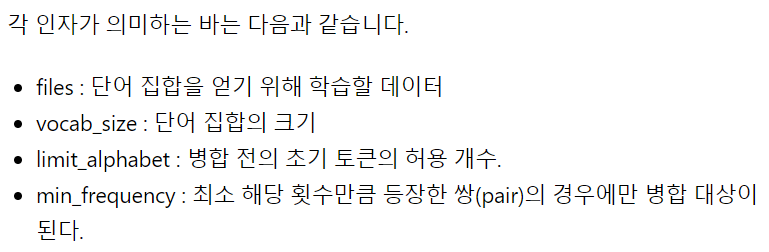

In [8]:
# vocab 저장
tokenizer.save_model('./')

['./vocab.txt']

In [9]:
# vocab 로드
df = pd.read_fwf('vocab.txt', header=None)
df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
...,...
29995,말밖에는
29996,맘을
29997,맛도
29998,망하지


In [10]:
encoded = tokenizer.encode('아 배고픈데 짜장면먹고싶다')
print('토큰화 결과 :',encoded.tokens) # 해당 토크나이저가 어떻게 토큰화를 진행했는지를 보여줌
print('정수 인코딩 :',encoded.ids) # 정수 인코딩 결과를 출력
print('디코딩 :',tokenizer.decode(encoded.ids)) # 정수 시퀀스를 문자열로 복원

토큰화 결과 : ['아', '배고', '##픈', '##데', '짜장면', '##먹고', '##싶다']
정수 인코딩 : [2111, 20630, 3826, 3481, 24682, 7871, 7379]
디코딩 : 아 배고픈데 짜장면먹고싶다


## 기타 토크나이저

이 외 ByteLevelBPETokenizer, CharBPETokenizer, SentencePieceBPETokenizer 등이 존재하며 선택에 따라서 사용할 수 있습니다.

- BertWordPieceTokenizer : BERT에서 사용된 워드피스 토크나이저(WordPiece Tokenizer)
- CharBPETokenizer : 오리지널 BPE
- ByteLevelBPETokenizer : BPE의 바이트 레벨 버전
- SentencePieceBPETokenizer : 앞서 본 패키지 센텐스피스(SentencePiece)와 호환되는 BPE 구현체

In [11]:
from tokenizers import ByteLevelBPETokenizer, CharBPETokenizer, SentencePieceBPETokenizer

tokenizer = SentencePieceBPETokenizer()
tokenizer.train('naver_review.txt', vocab_size=10000, min_frequency=5)

encoded = tokenizer.encode("이 영화는 정말 재미있습니다.")
print(encoded.tokens)

['▁이', '▁영화는', '▁정말', '▁재미있', '습니다.']
